In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [8]:
dataset=input()

DS_DATESET.csv


In [9]:
df=pd.read_csv(dataset)

In [10]:
df.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [4]:
df.shape

(10000, 32)

In [5]:
#dropping columns with missing values
df.drop(['Certifications/Achievement/ Research papers','Link to updated Resume (Google/ One Drive link preferred)',
         'link to Linkedin profile'], axis=1, inplace=True)

# Data Visualization Model

In [6]:
pp = PdfPages('Visualization_Model.pdf')

a. The number of students applied to different technologies.

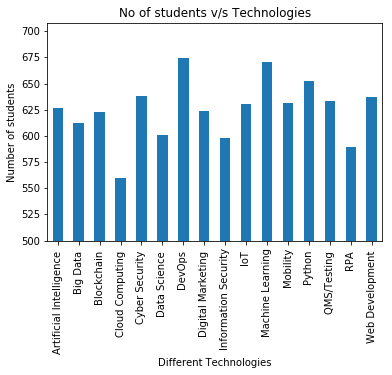

In [7]:
df['Areas of interest'].value_counts().sort_index().plot.bar()

plt.title('No of students v/s Technologies')
plt.ylabel('Number of students')
plt.xlabel('Different Technologies')
plt.ylim(bottom=500)
pp.savefig(bbox_inches = 'tight')

b. The number of students applied for Data Science who knew ‘’Python” and who didn’t.

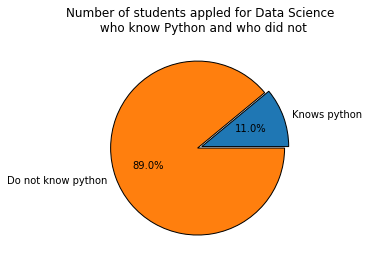

In [8]:
data_sc_python=df[(df['Areas of interest']=='Data Science ') & (df['Programming Language Known other than Java (one major)']=='Python')]['Areas of interest'].value_counts()[0]
data_sc_without_python=df[(df['Areas of interest']=='Data Science ') & (df['Programming Language Known other than Java (one major)']!='Python')]['Areas of interest'].value_counts()[0]

y_axis=[data_sc_python,data_sc_without_python]
x_axis=['Knows python', 'Do not know python']
explode=[0,0.05]

plt.pie(y_axis,labels=x_axis, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor':"black"})
plt.title('Number of students appled for Data Science \n who know Python and who did not')
pp.savefig(bbox_inches = 'tight')

c. The different ways students learned about this program.

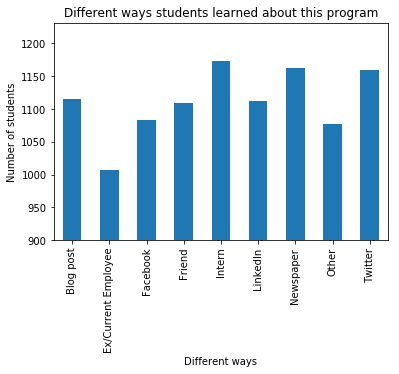

In [9]:

df['How Did You Hear About This Internship?'].value_counts().sort_index().plot.bar()

plt.title('Different ways students learned about this program')
plt.ylabel('Number of students')
plt.xlabel('Different ways')
plt.ylim(bottom=900)
pp.savefig(bbox_inches = 'tight')

d. Students who are in the fourth year and have a CGPA greater than 8.0

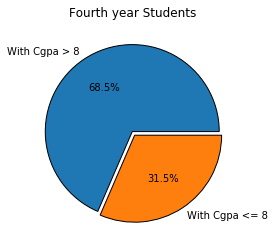

In [10]:

fourth_year=df[(df['Which-year are you studying in?']=='Fourth-year')].count()[0]
fourth_year_8cgpa=df[(df['Which-year are you studying in?']=='Fourth-year') & (df['CGPA/ percentage']>8.0)].count()[0]
remaining_students=fourth_year-fourth_year_8cgpa

slices=[fourth_year_8cgpa,remaining_students]
label=['With Cgpa > 8','With Cgpa <= 8']
explode=[0,0.05]

plt.pie(slices, labels=label, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor':"black"})
plt.title('Fourth year Students')
pp.savefig(bbox_inches = 'tight')

e. Students who applied for Digital Marketing with verbal and written communication score greater than 8.

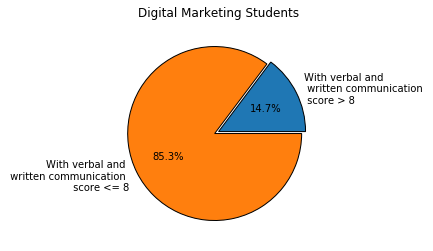

In [11]:

dig_market=df[(df['Areas of interest']=='Digital Marketing ')].count()
dig_market_cgpa=df[(df['Areas of interest']=='Digital Marketing ') & (df['Rate your written communication skills [1-10]']>8) & (df['Rate your verbal communication skills [1-10]']>8)].count()
remaining_ones=dig_market-dig_market_cgpa

slices=[dig_market_cgpa[0],remaining_ones[0]]
label=['With verbal and \n written communication \n score > 8','With verbal and \n written communication \n score <= 8']
explode=[0,0.05]

plt.pie(slices, labels=label, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor':"black"})
plt.title('Digital Marketing Students')
pp.savefig(bbox_inches = 'tight')

f. Year-wise and area of study wise classification of students.

In [12]:
def year_area_wise():
    first_year=[]
    second_year=[]
    third_year=[]
    fourth_year=[]
    for k,v in df.groupby(['Which-year are you studying in?','Major/Area of Study']):
        if(k[0]=='First-year'):
            first_year.append(len(v))
        elif(k[0]=='Second-year'):
            second_year.append(len(v))
        elif(k[0]=='Third-year'):
            third_year.append(len(v))
        elif(k[0]=='Fourth-year'):
            fourth_year.append(len(v))  
    return first_year,second_year,third_year,fourth_year

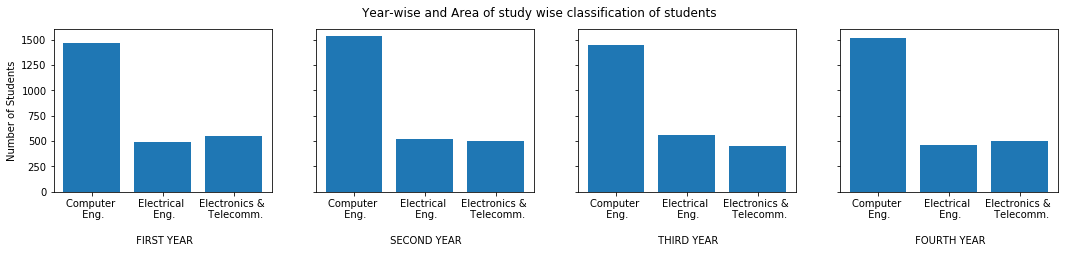

In [13]:

first_year,second_year,third_year,fourth_year=year_area_wise()
x_axis=['Computer \n Eng.','Electrical \n Eng.','Electronics & \n Telecomm.']

fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(18,3),sharey=True)

ax1.bar(x_axis,first_year)
ax2.bar(x_axis,second_year)
ax3.bar(x_axis,third_year)
ax4.bar(x_axis,fourth_year)

fig.suptitle('Year-wise and Area of study wise classification of students')

ax1.set_ylabel('Number of Students')
ax1.set_xlabel('\n FIRST YEAR')
ax2.set_xlabel('\n SECOND YEAR')
ax3.set_xlabel('\n THIRD YEAR')
ax4.set_xlabel('\n FOURTH YEAR')
pp.savefig(bbox_inches = 'tight')

g. City and college wise classification of students.

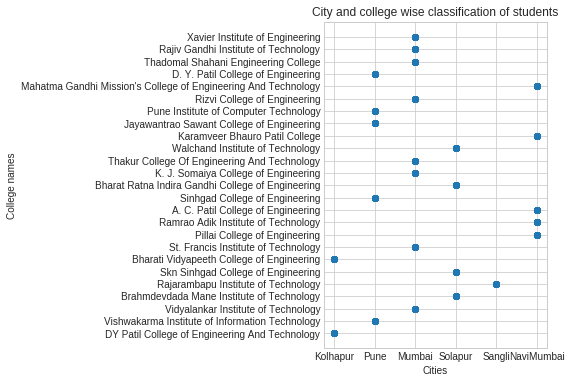

In [14]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(4, 6))
plt.scatter(df['City'],df['College name'])
plt.title('City and college wise classification of students')
plt.xlabel('Cities')
plt.ylabel('College names')
pp.savefig(bbox_inches = 'tight')

h. Plot the relationship between the CGPA and the target variable.

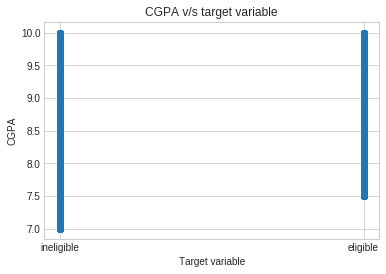

In [15]:
plt.scatter(df['Label'],df['CGPA/ percentage'])
plt.xlabel('Target variable')
plt.ylabel('CGPA')
plt.title('CGPA v/s target variable')
pp.savefig(bbox_inches = 'tight')

i. Plot the relationship between the Area of Interest and the target variable.

In [16]:
def area_target():
    eligible=[]
    ineligible=[]
    keys=[]
    count=0
    for k,v in df.groupby(['Areas of interest','Label']):
        #print(k,len(v))
        keys.append(k[0])
        if(count%2==0):
            eligible.append(len(v))
        else:
            ineligible.append(len(v))
        count=count+1
    keys=sorted(set(keys))
    return keys,eligible,ineligible

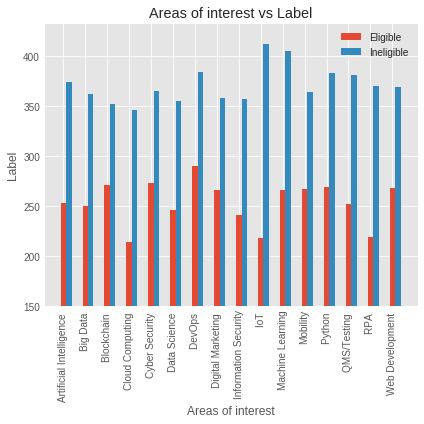

In [17]:
keys,eligible,ineligible=area_target()
plt.style.use('ggplot')
x_values=np.arange(len(keys))
width=0.25

plt.figure(figsize=(6,6))
plt.bar(x_values, eligible,  width=width, label='Eligible')
plt.bar(x_values+width, ineligible, width=width, label='Ineligible')
plt.xticks(ticks=x_values,labels=keys,rotation='vertical')

plt.title('Areas of interest vs Label')
plt.xlabel('Areas of interest')
plt.ylabel('Label')
plt.ylim(bottom=150)
plt.legend()
plt.tight_layout()
pp.savefig(bbox_inches = 'tight')

j. Plot the relationship between the year of study, major, and the target variable.

In [18]:
def plots(col1,col2):
    eligible=[]
    ineligible=[]
    keys=[]
    for k,v in df.groupby([col1,col2]):
        #print(k,len(v))
        keys.append(k[0])
        if(k[1]=='eligible'):
            eligible.append(len(v))
        else:
            ineligible.append(len(v))
    keys=sorted(set(keys))
    return eligible,ineligible,keys

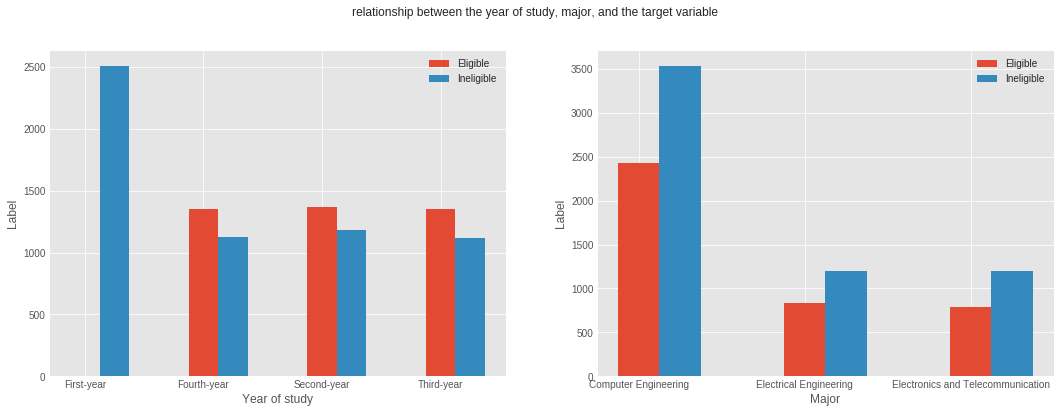

In [19]:
year_eli,year_ineli,year=plots('Which-year are you studying in?','Label')
major_eli,major_ineli,major=plots('Major/Area of Study','Label')
year_eli=[0,1349, 1365, 1349]

plt.style.use('ggplot')
x_values1=np.arange(len(year))
x_values2=np.arange(len(major))
width=0.25

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,6))

ax1.bar(x_values1, year_eli, width=width, label='Eligible')
ax1.bar(x_values1+width, year_ineli, width=width, label='Ineligible')
ax2.bar(x_values2, major_eli, width=width, label='Eligible')
ax2.bar(x_values2+width, major_ineli, width=width, label='Ineligible')

plt.sca(ax1)
plt.xticks(ticks=x_values1,labels=year)
plt.sca(ax2)
plt.xticks(ticks=x_values2,labels=major)

fig.suptitle('relationship between the year of study, major, and the target variable')

ax1.set_ylabel('Label')
ax1.set_xlabel('Year of study')
ax2.set_ylabel('Label')
ax2.set_xlabel('Major')
ax1.legend()
ax2.legend()
pp.savefig(bbox_inches = 'tight')

In [20]:
pp.close()

# Classification Model

In [21]:
y=df['Label']
X=df[['Major/Area of Study','Which-year are you studying in?','CGPA/ percentage','Areas of interest',
      'Programming Language Known other than Java (one major)',
     'Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]']]

In [22]:
def categorical_encoding(X,y):
    le = LabelEncoder()
    #le.fit(y.astype(str))
    y = le.fit_transform(y.astype(str))
    x_list=['Major/Area of Study','Which-year are you studying in?','CGPA/ percentage','Areas of interest',
            'Programming Language Known other than Java (one major)',
            'Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]']
    for i in x_list:
        #le.fit(X[i].astype(str))
        X[i] = le.fit_transform(X[i].astype(str))

In [23]:
categorical_encoding(X,y)

/home/swati/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [25]:
clf = MLPClassifier(random_state=1, max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/swati/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 967,    7],
       [ 144, 1382]])

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9396


In [28]:
f1_score(y_test, y_pred, average='weighted')

0.9401650163094224